In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
songs = pd.read_csv('/content/songs.csv')
members = pd.read_csv('/content/memb.csv')

In [3]:
train_merged = train.merge(songs, how='left', on='song_id').merge(members, how='left', on='msno')

In [4]:
train_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005


In [5]:
test_merged = test.merge(songs, how='left', on='song_id').merge(members, how='left', on='msno')

In [6]:
test_merged.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,1.0,0.0,NaN,7.0,20160219.0,20170918.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,1.0,0.0,NaN,7.0,20160219.0,20170918.0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,1.0,0.0,NaN,4.0,20161117.0,20161124.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,3.0,30.0,male,9.0,20070725.0,20170430.0
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,3.0,30.0,male,9.0,20070725.0,20170430.0


In [7]:
train_merged.shape

(1048575, 18)

In [8]:
test_merged.shape

(15459, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


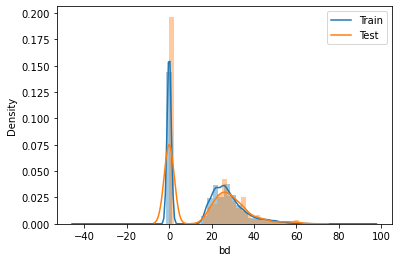

In [9]:
sns.distplot(train_merged.bd[train_merged.bd < 100])
sns.distplot(test_merged.bd[test_merged.bd < 100])
plt.legend(['Train', 'Test'])
plt.show()

In [10]:
only_train_merged = train_merged[:int(len(train_merged)*0.8)]
val_merged = train_merged[int(len(train_merged)*0.8):]

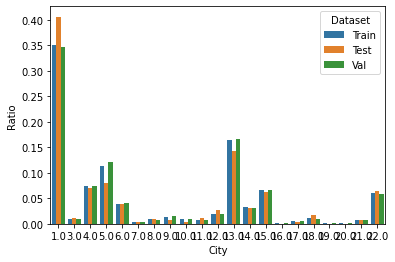

In [11]:
city_ratios = pd.concat([
    train_merged.city.value_counts(normalize=True),
    test_merged.city.value_counts(normalize=True),
    val_merged.city.value_counts(normalize=True)
], keys=['Train', 'Test', 'Val']).reset_index()
city_ratios.columns = ['Dataset', 'City', 'Ratio']
sns.barplot(data=city_ratios, hue='Dataset', x='City', y='Ratio')
plt.show()

In [15]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [17]:
print(train_merged.isnull().values.any())
print(test_merged.isnull().values.any())

True
True


In [19]:
print(train_merged.columns[train_merged.isnull().any()].tolist(), '\n')
print(test_merged.columns[test_merged.isnull().any()].tolist())


['source_system_tab', 'source_screen_name', 'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'gender'] 

['song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date']


In [20]:
import missingno as msno

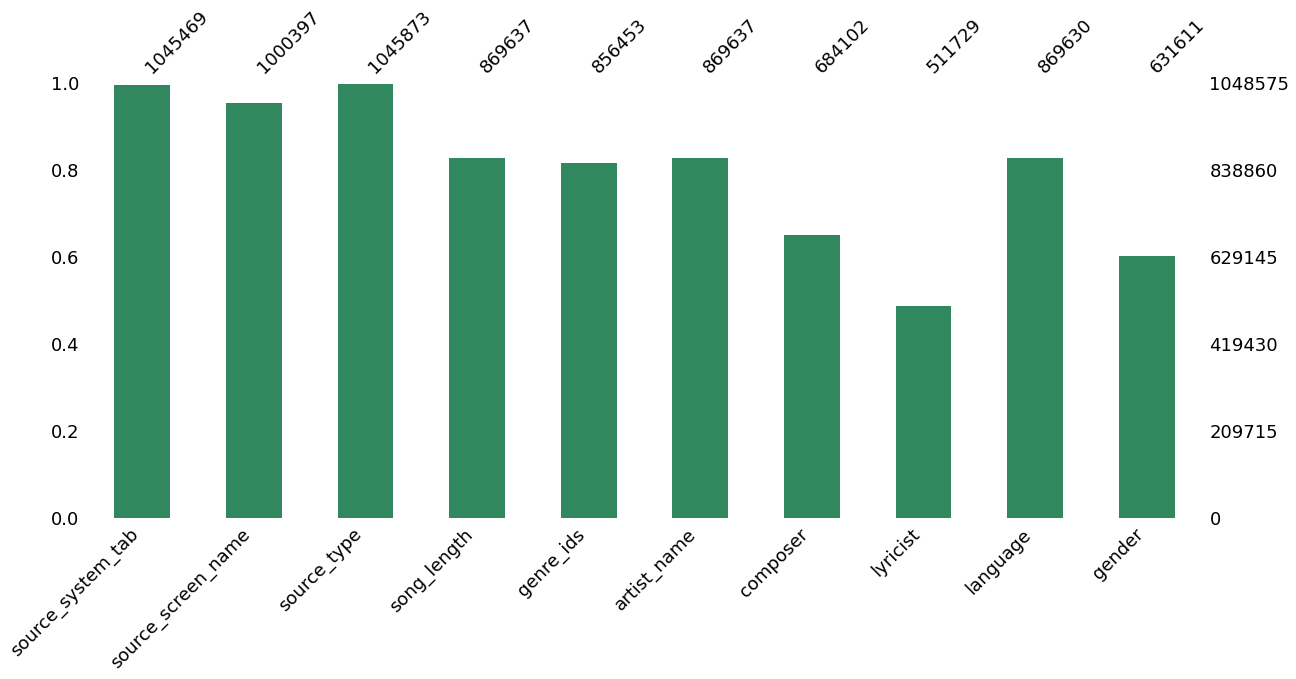

In [23]:
msno.bar(train_merged[train_merged.columns[train_merged.isnull().any()].tolist()],figsize=(20,8),color="#32885e",fontsize=18,labels=True,)

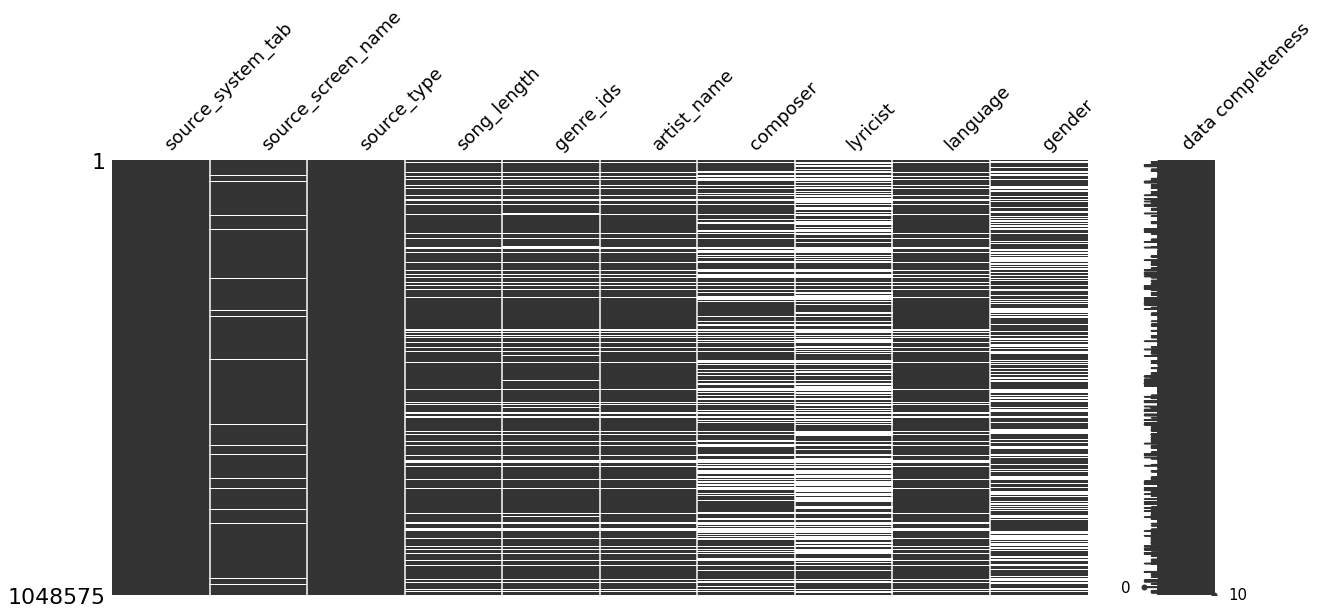

In [24]:
msno.matrix(train_merged[train_merged.columns[train_merged.isnull().any()].tolist()],width_ratios=(10,1),\
            figsize=(20,8),color=(0.2,0.2,0.2),fontsize=18,sparkline=True,labels=True)

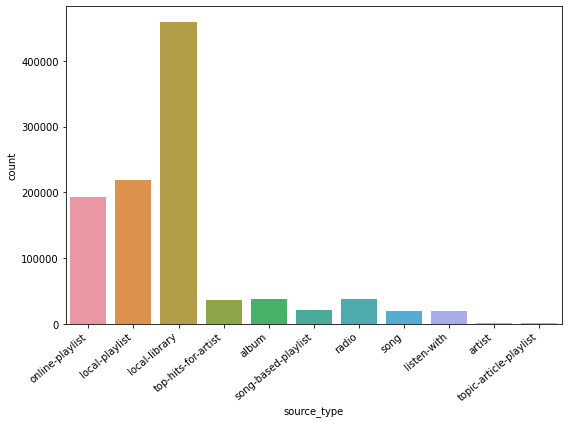

In [25]:
#SOURCE_TYPE
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "source_type", data = train_merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

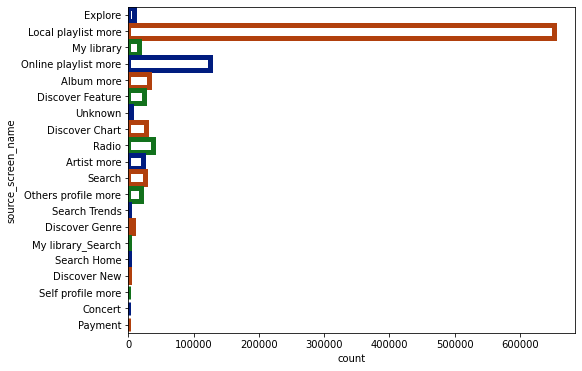

In [26]:
#SOURCE_SCREEN_NAME
plt.figure(figsize = (8, 6))
ax = sns.countplot(y=train_merged['source_screen_name'], data=train_merged, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))
plt.show()

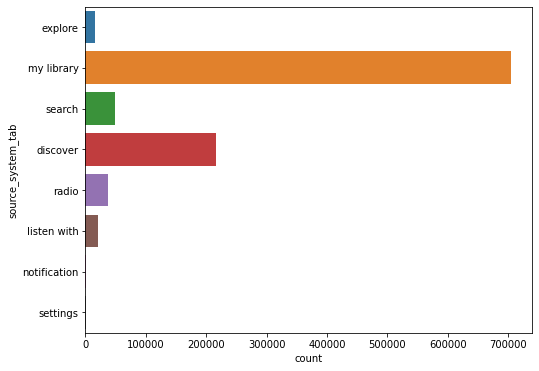

In [27]:
#SOURCE_SYSTEM_TAB
plt.figure(figsize = (8, 6))
ax = sns.countplot(y = "source_system_tab", data = train_merged)
plt.show()

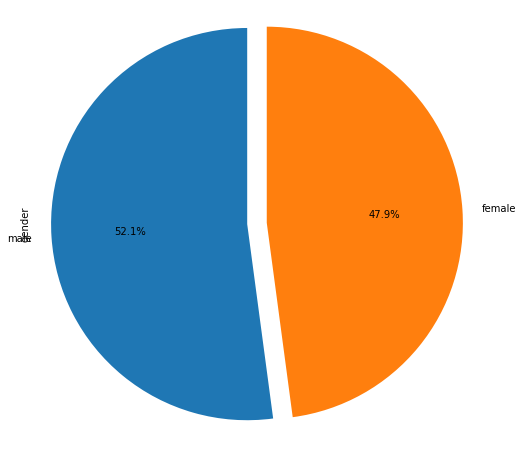

In [28]:
#GENDER
plt.figure(figsize = (8, 8))
pp = pd.value_counts(train_merged.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05))
plt.axis('equal')
plt.show()

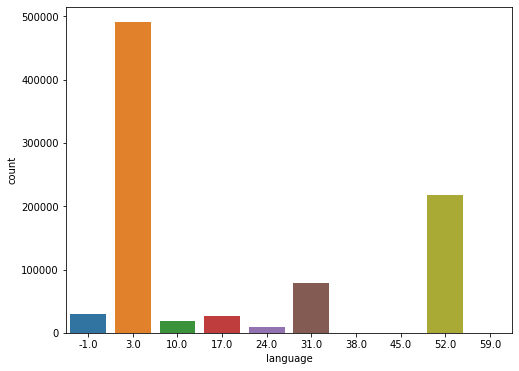

In [29]:
#LANGUAGE
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "language", data = train_merged)
plt.show()


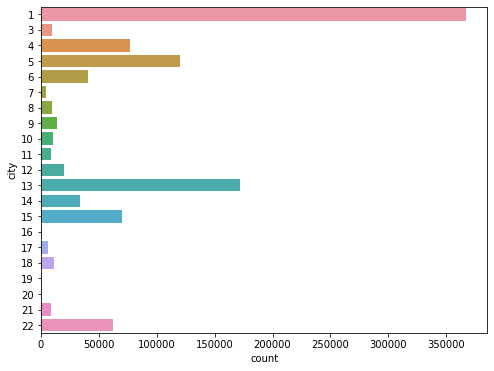

In [30]:
#CITY
plt.figure(figsize = (8, 6))
ax = sns.countplot(y = "city", data = train_merged)
plt.show()